> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, type the following in the console:


> `> ipython nbconvert [this_notebook.ipynb] --to slides --post serve`


> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View --> Cell Toolbar --> None`.

In [1]:
%%html
<style>
table,td,tr,th {border:none !important; }
</style>

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Clustering and K-Means

_Authors: Dave Yerrington (SF), Joseph Nelson (DC)_

---

![](https://snag.gy/kYWumd.jpg)

### Learning Objectives
*After this lesson, you will be able to:*

- Understand basic unsupervised clustering problems.
- Format and pre-process data for clustering.
- Perform a k-means clustering analysis.
- Evaluate clusters for fit. 

### Lesson Guide
- [Unsupervised Learning](#unsupervised)
- [Introduction to Clustering](#intro)
- [What is Clustering?](#what)
- [KNN Review](#knn)
- [Clustering Algorithms](#algos)
- [K-Means Clustering](#k-means)
- [Refresher: Euclidean Distance](#euclidean)
- [K-Means Step by Step](#km-steps)
- [K-Means: A Visual Example](#vis)
- [K-Means: Caveats and Pitfalls](#caveats)
    - [Sensitive to Outliers](#sensitive)
    - [Sensitive to Centroid Initialization](#centroid-init)
    - [How Many K?](#how-many-k)
- [Choosing K](#choose-k)
- [A Note on K-Means Convergence](#converge)
- [K-means in Scikit-Learn](#kmeans-skl)
    - [Visually Verifying Cluster Labels](#verify)
- [Metrics: Inertia and the Silhouette Coefficient](#sil)
- [Practice: Use K-Means on the "Isotopic Composition Plutonium Batches" Data](#pluto)
    - [How Does Scaling Affect Fit?](#scaling)
- [Conclusion: K-Means Trade-Offs](#conclusion)
- [Additional Resources](#resources)

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 

<a id='unsupervised'></a>

## Unsupervised Learning

---

> **Supervised --> Classification**: Create a model to predict to which group a point belongs.

> **Unsupervised --> Clustering**: Find groups that already exist in the data.

Until now, we haven't talked much about unsupervised learning. We use unsupervised methods when we don't have labeled data. There are no true targets to predict; we derive the likely categories from the structure in our data.

| Pros | Cons |
|---|---|
| No labels. | Difficult to evaluate correctness without subject matter expertise. |
| Few or no assumptions about data. | Scaling/normalization often required. |
| Useful for subset/segmentation discovery. | Can be difficult to visualize. |
| Great for broad insights. | Extremely difficult to tune. |
| Many models available. | No obvious choice in many cases. |
| Black magic. | Considered unconventional and unreliable. |

<a name="intro"></a>
## Introduction to Clustering

---

### Helpful Uses for Clustering 
   - Finding items with similar behavior (users, products, voters, etc.).
   - Market segmentation.
   - Understanding complex systems.
   - Discovering meaningful categories for your data.
   - Reducing the number of classes by grouping (e.g., bourbons, scotches -> whiskeys).
   - Reducing the dimensions of your problem.
   - Pre-processing is important! Creating labels for supervised learning.

### Genetics
![](https://snag.gy/TP2RA4.jpg)

### Consumer Internet

<table>
    <tr>
        <td><img src="https://snag.gy/EbLeqd.jpg"></td>
        <td><img src="https://snag.gy/xsNvK8.jpg"></td>
    </tr>
</table>


### Business

<table>
    <tr>
    <td><img src="https://snag.gy/pDueQ2.jpg" width="500"></td>
    <td>
         <li>Identifying demographics.</li>
        <li>Spending patterns.</li>
        <li>Consumer trends.</li>
        <li>Customer characteristics.</li>
        <li>Recommender systems.</li>
        <li>Taxonomy/categorization.</li>
    </td>
    </tr>
</table>


## What Do We Mean by "Labeled Data?"
- Give some examples!

<img src="https://snag.gy/YUt5RO.jpg" style="float: left; margin-right: 25px; width: 250px">

## What Problems Do You Think Arise During "Clustering?"

Follow up:

- How accurate do you think these are?
- What kind of data are we talking about?

<a id='what'></a>
## What is Clustering? 

---

<img src="https://snag.gy/BdfATE.jpg" style="width: 500px">

Clustering is one of the most ubiquitous and widespread processes for assigning discrete structure to data. In clustering, we group observations together in a data set such that the members of a group are more similar to each other than they are to members of other groups. There are a wide variety of methods and criteria for performing this task.

**Properties of clustering procedures:**

- No "true" target/response to compare.
- We apply structure to data quantitatively based on specific criteria.
- Predictions of labels are based on the structure of the data.

For example: Your employer gives you a data set of voter preferences from a local poll. They want you to figure out how these voters are grouping based on their preferences. The answer? Clustering!

<a id='knn'></a>
## KNN Review

---

KNN is a supervised classification method.

![](https://snag.gy/WPF4ZS.jpg)


**Check:** Why is KNN a classification method? What makes KNN supervised as opposed to unsupervised?

**Any ideas of how the KNN algorithm could be modified to be *unsupervised?***

<a name="algos"></a>
## Clustering Algorithms 

---

The are many different algorithms that can perform clustering when given a data set:

- **K-means**: Mean centroids.
- **Hierarchical**: Nested clusters created by merging or splitting successively.
- **DBSCAN**: Density based.
- **Affinity propagation**: Graph-based approach to let points "vote" on their preferred "exemplar."
- **Mean shift**: Can find the number of clusters.
- **Spectral clustering**.
- **Agglomerative clustering**: Suite of algorithms based on applying the same criteria/characteristics of one cluster to others.

Today we're going to look at one of the algorithms: **k-means.**

<a id='k-means'></a>
## K-Means Clustering

---

#### K-means is the most popular clustering algorithm.

K-means is one of the easier clustering methods to understand; other clustering techniques use some of the same assumptions on which k-means relies.

- **K** is the number of clusters.
- **Means** refers to the mean points of the K clusters.

The number of clusters, $k$, is chosen in advance. The goal is to partition the data into sets such that the total sum of squared distances from each point to the mean point of the cluster is minimized.

The algorithm takes your entire data set and iterates over its features and observations to determine clusters based around center points. These center points are known as **centroids**. 

**K-means iterative fitting:**

1) Pick a value for k (the number of clusters to create).
2) Initialize k centroids (starting points) in your data.
3) Create your clusters. Assign each point to the nearest centroid. 
4) Make your clusters better. Move each centroid to the center of its cluster. 
5) Repeat Steps 3 and 4 until your centroids converge. 

> **Note:** Unfortunately, there's no formula to determine the absolute best number of $k$ clusters. Unsupervised learning is inherently subjective! We can, however, choose the "best" $k$ based on predetermined criteria. 

<a id='euclidean'></a>
## Refresher: Euclidean Distance

---

### $$ d(x_1, x_2) = \sqrt{\sum_{i=1}^N (x_{1i} - x_{2i})^2} $$

**As an example, take two points:**

- $x1 = (2, -1)$
- $x2 = (-2, 2)$

**The Euclidean distance between these two points is:**

### $$\begin{aligned}
d(x1, x2) &= \sqrt{ (2 - (-2))^2 + ((-1) - 2)^2 } \\
d(x1, x2) &= \sqrt{25} \\
d(x1, x2) &= 5 
\end{aligned}$$

**Using scikit-learn:**
```python
import numpy as np
from sklearn.metrics import euclidean_distances
X = np.array([[2, -1], [-2, 2]])
print euclidean_distances(X)
```

<a id='km-steps'></a>
## K-Means: Step by Step

---

<table width="500" cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/7haoS3.jpg" style="width: 150px"></td>
   <td style="vertical-align: top; width: 400px;"><br><b>Step 1.</b><br>We have data in an n-dimensional feature space (2-D, for example).</td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/DaIVgk.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><br><b>Step 2.</b><br>Initialize K centroid (2 here).</td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/DaIVgk.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 3.</b><br>Assign points to *closest* cluster based on _Euclidean distance_.<br><br>$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$

   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/NY1EeT.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 4.</b><br>Calculate mean of points assigned to centroid (2 here). Update new centroid positions to mean (i.e., geometric center).<br><br>$new\ centroid\ position= \bar{x}, \bar{y}$
   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/tSfDZs.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Step 5.</b><br>Repeat Steps 3–4, updating class membership based on centroid distance.
   </td>
</tr>
<tr>
</table>

<table width=500 cellpadding="50"> 
<tr>
   <td><img src="https://snag.gy/BbIicn.jpg" style="width: 150px !important;"></td>
   <td style="align: top; width: 400px; vertical-align: top;"><b>Fin.</b><br>Convergence is met once all points no longer change to a new class (defined by closest centroid distance).
   </td>
</tr>
<tr>
</table>

<a id='vis'></a>
## K-Means: A Visual Example


---

![](https://snag.gy/5hFXUA.jpg)

<a id='caveats'></a>
## A Few K-Means Caveats

---

Nothing is perfect!

<a id='sensitive'></a>
### K-means is sensitive to outliers.

![](https://snag.gy/WFNMQY.jpg)

<a id='centroid-init'></a>
### K-means Is sensitive to centroid initialization.

![](https://snag.gy/5sigCD.jpg)

<a id='how-many-k'></a>
### How Many Ks?

Sometimes it's obvious; sometimes it's not. What do you think?

<table>
    <tr>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/4rU39.png"><br>1</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="http://i.stack.imgur.com/gq28F.png"><br>2</td>
        <td valign="bottom" style="vertical-align: bottom; text-align: center;"><img src="https://snag.gy/cWPgno.jpg"><br>3</td>
    </tr>
</table>

<a id='choose-k'></a>
## Choosing K

---

There are different methods of initializing centroids. For instance:

- Randomly.
- Manually.
- Special `k-means++` method in scikit-learn. (_This initializes the centroids to be generally distant from each other._)

**Depending on your problem, you may find some of these are better than others.**

> **Note:** Manual is recommended if you know your data well enough to see the clusters without much help but is rarely used in practice.

<a id='converge'></a>
## A Note on K-Means Convergence

---

In general, k-means will converge to a solution and return a partition of k clusters, even if no natural clusters exist in the data. It's entirely possible – *common*, in fact – that the clusters don't mean anything at all. 

**Knowing your domain and data set is essential. Evaluating the clusters visually is a must (if possible).**

> _"Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times with different initializations of the centroids. One method to help address this issue is the `k-means++` initialization scheme, which has been implemented in scikit-learn (use the `init='kmeans++'` parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference."_ — [Scikit-Learn Clustering Guide](http://scikit-learn.org/stable/modules/clustering.html#k-means)

![](http://www.datamilk.com/kmeans_animation.gif)

<a id='kmeans-skl'></a>
## K-Means in Scikit-Learn

---

Below, we will implement k-means using scikit-learn.

In [3]:
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

X, y = make_blobs(
    n_samples    =  200, 
    centers      =  3, 
    n_features   =  2,
    random_state =  0
)


df = pd.DataFrame(X, columns=['x', 'y'])
df.head()


,x,y
0,-1.733808,3.798061
1,0.628358,4.460136
2,1.131218,4.681950
3,-1.429179,3.500836
4,1.274508,5.630173


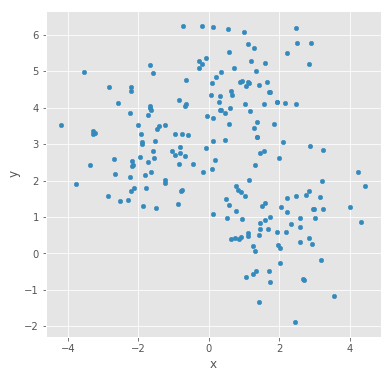

In [4]:
df.plot(kind="scatter", x="x", y="y", figsize=(6, 6))

In [5]:
## Take note that the latest version of k-means behaves a little differently now.
model = KMeans(n_clusters=3, random_state=0).fit(df)

After we fit our data, we can get our predicted labels from `model.labels_` and the center points`model.cluster_centers_`.

In [6]:
predicted = model.labels_
centroids = model.cluster_centers_

print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [1 0 0 1 0 1 2 0 0 1 0 1 0 0 0 1 2 2 1 1 1 2 0 0 1 1 2 1 1 1 0 0 1 0 2 2 0
 2 2 1 2 1 1 1 0 0 0 1 0 0 0 2 1 1 1 1 2 2 0 0 1 0 0 2 2 1 2 2 1 2 2 0 0 1
 0 1 2 2 2 1 1 0 0 2 2 0 0 1 0 2 1 1 2 0 2 0 0 1 1 2 2 0 1 0 1 0 2 0 1 2 0
 1 2 0 0 0 0 2 1 1 2 2 1 0 2 1 1 2 1 0 1 2 2 2 0 2 2 0 2 1 1 1 0 2 2 0 1 1
 2 0 2 1 1 1 0 2 2 2 0 0 2 1 1 1 0 0 2 1 2 2 1 2 0 2 1 1 2 1 0 2 0 1 2 2 2
 2 1 2 0 0 1 1 2 2 2 2 1 2 0 2]
Location of centroids: 
[[ 0.97692125  4.56883102]
 [-1.71656153  2.91261167]
 [ 1.98410174  0.81302038]]


In [7]:
df['predicted'] = predicted
df.head()

,x,y,predicted
0,-1.733808,3.798061,1
1,0.628358,4.460136,0
2,1.131218,4.681950,0
3,-1.429179,3.500836,1
4,1.274508,5.630173,0


<a id='verify'></a>
### Visually Verifying Cluster Labels

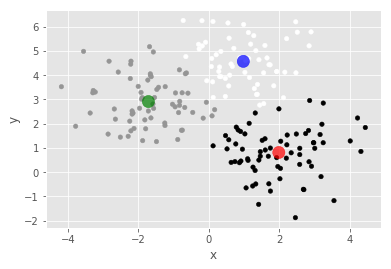

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

df.plot(x="x", y="y", kind="scatter", color=df['predicted'], )#colormap='gist_rainbow', alpha=.7)
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, cmap='gist_rainbow',c=['b','g','r'])

<a id='sil'></a>

## Metrics: Inertia and the Silhouette Coefficient

---

**Inertia**: The sum of squared errors for each cluster.

- Low inertia = dense cluster.
- Ranges from zero to very high values.

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$
Where $\mu_i$ is a cluster centroid (k-means explicitly tries to minimize this).

`.inertia_` is an attribute of scikit-learn's k-means models.

**Silhouette coefficient**: The measure of how far apart clusters are from each other.

- High silhouette score = clusters are well separated.
- Ranges from negative one to one.

The definition is a little involved but, intuitively, the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate this in scikit-learn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.
- https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [9]:
score = silhouette_score(df, predicted, metric='euclidean')
score

0.5388481927664504

<a id='pluto'></a>
## Practice: Scikit-Learn and K-Means With "Isotopic Composition Plutonium Batches"

---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238: The percentage of (238)Pu, always less than two percent.

    Pu239: The percentage of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240: The percentage of the plutonium 240 isotope.

    Pu241: The percentage of the plutonium 241 isotope.

In [10]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"
# There is also a copy of the CSV file in the "assets/datasets" file.


df = pd.read_csv(csv_file)

###  Use Pu239 and Pu240 as Our Features
1) Select only columns "Pu239" and "Pu240" to use for our example.
2) Plot to see how it looks.
3) Initialize an instance of `KMeans` from `sklearn`.
4) Fit our sliced DataFrame with `fit`.

In [11]:
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


In [24]:
df_sel = df[['Unnamed: 0','Pu239', 'Pu240']]

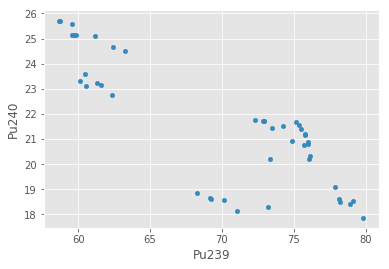

In [25]:
df_sel.plot(x="Pu239", y="Pu240", kind="scatter")

In [26]:
model = KMeans(n_clusters=3, random_state=0).fit(df_sel[['Pu239', 'Pu240']])
predicted = model.labels_
centroids = model.cluster_centers_

df_sel['predicted'] = predicted
print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [1 1 1 1 2 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 2 1 1 2 2 2 1 2 2 2 2 2 1 1 1 0
 0 0 0 0 2 2 1 0]
Location of centroids: 
[[60.63393333 24.38753333]
 [76.593      20.19483333]
 [71.57316667 19.97391667]]


C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


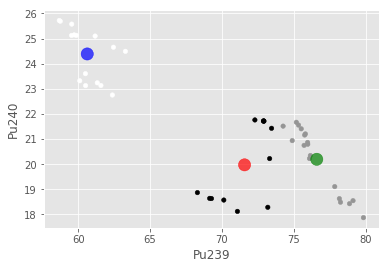

In [27]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

df_sel.plot(x='Pu239', y='Pu240', kind="scatter", color=df_sel['predicted'], )#colormap='gist_rainbow', alpha=.7)
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, cmap='gist_rainbow',c=['b','g','red'])

In [28]:
# 1. Run k-means against our two features with three clusters.

# 2. Assign clusters back to our DataFrame.

# 3. Get our centroids.

# 4. Plot the scatter of our points with calculated centroids.

<a id='scaling'></a>
### Try Standardizing the Data First and See How It Affects the Cluster Assignment

In [19]:
def_sel_ss = (df_sel[['Pu239', 'Pu240']] - df_sel[['Pu239', 'Pu240']].mean())/df_sel[['Pu239', 'Pu240']].std()

,Pu239,Pu240
0,0.822808,-0.136632


In [20]:
model = KMeans(n_clusters=3, random_state=0).fit(def_sel_ss)
predicted = model.labels_
centroids = model.cluster_centers_

def_sel_ss['predicted'] = predicted
print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [0 0 0 2 0 2 0 0 1 1 1 1 1 1 1 1 2 2 0 2 1 2 0 0 0 0 0 0 2 2 2 2 2 0 0 2 1
 1 1 1 1 0 0 0 1]
Location of centroids: 
[[ 0.66617884 -0.15213614]
 [-1.30385586  1.18350945]
 [ 0.63055157 -1.25118259]]


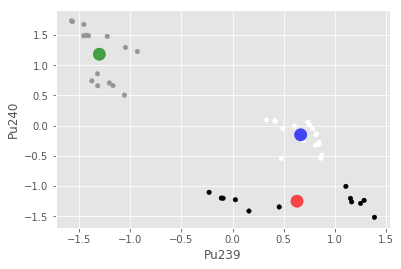

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(7,7))

def_sel_ss.plot(x='Pu239', y='Pu240', kind="scatter", color=def_sel_ss['predicted'], )#colormap='gist_rainbow', alpha=.7)
plt.scatter(centroids[:,:1], centroids[:,1:], marker='o', s=150, alpha=.7, cmap='gist_rainbow',c=['b','g','red'])

<a id='conclusion'></a>
## Conclusion: K-Means Trade-Offs

---

**K-means:**

- Unsupervised clustering model.
- Similar to KNN (but for clustering).
- Iteratively finds labels given k.
- Easy to implement in scikit-learn.
- Sensitive to shape and scale of data.
- Optimal k is hard to evaluate.

---

| Strengths | Weaknesses |
| -- | -- |
| K-means is popular because it's simple and computationally efficient. | However, K-means is highly scale dependent and isn't suitable for data of varying shapes and densities. |
| Easy to see results/intuitive. | Evaluating results is more subjective, requiring much more human evaluation than other trusted metrics. |

<a id='resources'></a>

## Additional Resources

---

- Andrew Moore's computer science class at Carnegie Mellon contains good, static visualization with step-by-step details. His slide deck can be found online [here](http://www.cs.cmu.edu/~cga/ai-course/kmeans.pdf). He also links to more of his tutorials on the first page. 
- [Scikit-Learn Clustering Overview](http://scikit-learn.org/stable/modules/clustering.html#k-means)
- [Scikit-Learn K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
- [Scikit-Learn Clustering Code — See `k_init` for Explanation of `k-means++` Centroid Selection](https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/cluster/k_means_.py#L769)
- [Clustering Tutorial](http://home.deib.polimi.it/matteucc/Clustering/tutorial_html/)
- [Wikipedia's Deep Dive on Clustering](https://en.wikipedia.org/wiki/K-means_clustering)


**Some helpful Stack Exchange questions:**

- http://stats.stackexchange.com/questions/40613/why-dont-dummy-variables-have-the-continuous-adjacent-category-problem-in-clust
- http://stats.stackexchange.com/questions/174556/k-means-clustering-with-dummy-variables
- http://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data

